In [3]:
import numpy as np
import pandas as pd
data = pd.read_csv("C:\\Users\\Saeid\\OneDrive\\Desktop\\DataSet\\customer_bank_data.csv")
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS
0,1,41,UNDER GRADUATE,6,19,0.124,1.073,0,NBA001
1,2,47,SCHOOL,26,100,4.582,8.218,0,NBA021
2,3,33,UNDER GRADUATE,10,57,6.111,5.802,1,NBA013
3,4,29,UNDER GRADUATE,4,19,0.681,0.516,0,NBA009
4,5,47,SCHOOL,31,253,9.308,8.908,0,NBA008


In [4]:
print('EDUCATION', np.unique(data['EDUCATION']))

EDUCATION ['DOCTRATE' 'POST DOCTORAL RESEARCH' 'POST GRADUATE' 'SCHOOL'
 'UNDER GRADUATE']


In [5]:
data['EDUCATION'] = np.where(data['EDUCATION'] == 'DOCTRATE', '4', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'POST DOCTORAL RESEARCH', '5', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'POST GRADUATE', '3', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'SCHOOL', '1', data['EDUCATION'])
data['EDUCATION'] = np.where(data['EDUCATION'] == 'UNDER GRADUATE', '2', data['EDUCATION'])

In [6]:
print('EDUCATION', np.unique(data['EDUCATION']))

EDUCATION ['1' '2' '3' '4' '5']


In [7]:
data['DEBTINCOMERATIO'] = (data['CARDDEBT'] + data['OTHERDEBT']) / data['INCOME'] * 100

In [8]:
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS,DEBTINCOMERATIO
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2


In [9]:
data['EMPLOY_RATIO'] = data['YEARSEMPLOYED'] / data['AGE']

In [10]:
data.head()

,CUSTOMERID,AGE,EDUCATION,YEARSEMPLOYED,INCOME,CARDDEBT,OTHERDEBT,DEFAULTED,ADDRESS,DEBTINCOMERATIO,EMPLOY_RATIO
0,1,41,2,6,19,0.124,1.073,0,NBA001,6.3,0.146341
1,2,47,1,26,100,4.582,8.218,0,NBA021,12.8,0.553191
2,3,33,2,10,57,6.111,5.802,1,NBA013,20.9,0.303030
3,4,29,2,4,19,0.681,0.516,0,NBA009,6.3,0.137931
4,5,47,1,31,253,9.308,8.908,0,NBA008,7.2,0.659574


In [11]:
data = data[['DEBTINCOMERATIO', 'EMPLOY_RATIO']]
data = data[pd.notnull(data[['DEBTINCOMERATIO', 'EMPLOY_RATIO']])]


In [12]:
data.head()

,DEBTINCOMERATIO,EMPLOY_RATIO
0,6.3,0.146341
1,12.8,0.553191
2,20.9,0.303030
3,6.3,0.137931
4,7.2,0.659574


In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
inertia_list = []
for k in np.arange(1, 10):
    kmn = KMeans(n_clusters=k)
    kmn.fit(data.values)
    inertia_list.append(kmn.inertia_)
    
inertia_list

[38354.85967436235,
 13022.321016769525,
 6561.898384371123,
 3848.0390936794925,
 2638.407312547098,
 1874.6773262270979,
 1309.8695447658754,
 1020.8262368978742,
 806.6560625902993]

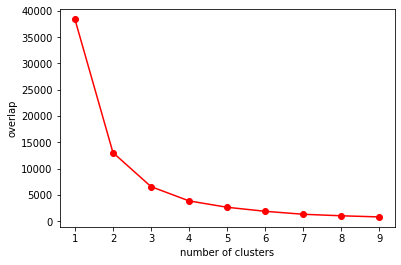

In [15]:
plt.plot(np.arange(1, 10), inertia_list, 'ro-')
plt.xlabel('number of clusters')
plt.ylabel('overlap')
plt.show()

In [16]:
kmn = KMeans(n_clusters=4)
kmn.fit(data.values)
labels = kmn.predict(data.values)
labels

array([3, 0, 1, 3, 3, 0, 3, 3, 1, 3, 3, 3, 3, 1, 0, 0, 3, 0, 0, 0, 3, 0,
       1, 0, 1, 0, 3, 1, 3, 0, 3, 1, 3, 0, 0, 0, 3, 0, 3, 3, 0, 0, 2, 3,
       1, 0, 1, 3, 3, 3, 3, 2, 2, 3, 1, 0, 3, 3, 3, 3, 1, 1, 0, 0, 3, 0,
       3, 0, 1, 1, 3, 3, 3, 1, 3, 0, 3, 0, 0, 3, 0, 2, 3, 0, 1, 3, 0, 0,
       0, 1, 3, 3, 3, 1, 3, 3, 0, 3, 1, 3, 2, 1, 3, 0, 0, 2, 3, 1, 3, 3,
       3, 1, 0, 1, 0, 3, 0, 0, 1, 3, 0, 0, 3, 3, 0, 3, 3, 3, 1, 3, 3, 0,
       0, 3, 1, 0, 3, 0, 0, 1, 1, 0, 0, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 1,
       3, 1, 3, 3, 1, 1, 3, 1, 3, 0, 0, 3, 3, 3, 3, 0, 1, 0, 3, 0, 3, 2,
       3, 3, 0, 3, 1, 3, 3, 2, 2, 2, 3, 0, 0, 3, 1, 2, 3, 3, 3, 0, 3, 0,
       1, 3, 0, 3, 1, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 1, 0, 2, 0, 3,
       0, 3, 3, 3, 0, 3, 1, 0, 2, 0, 3, 1, 1, 0, 1, 3, 0, 1, 2, 3, 0, 3,
       0, 3, 3, 3, 3, 0, 0, 0, 3, 1, 3, 2, 3, 2, 0, 0, 3, 0, 3, 0, 1, 3,
       1, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 3, 1, 1, 0, 0, 3, 2, 3, 0, 0, 0,
       0, 3, 3, 1, 3, 3, 3, 2, 3, 0, 0, 0, 0, 1, 3,

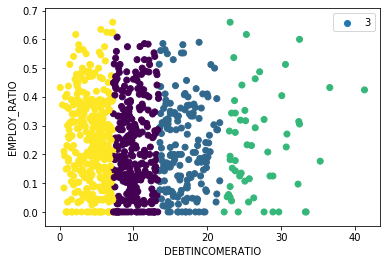

In [17]:
xs = data.values[:,0]
ys = data.values[:, 1]
plt.scatter(xs, ys, c=labels)
plt.legend(labels, loc='upper right')
plt.xlabel('DEBTINCOMERATIO')
plt.ylabel('EMPLOY_RATIO')
plt.show()

In [20]:
columns = ['Cluster']
shahin = pd.DataFrame(labels, index = None, columns=columns)
shahin.head()

,Cluster
0,0
1,3
2,1
3,0
4,0


In [21]:
shahin_final = data.join(shahin)
shahin_final
shahin_final.to_csv('C:\\Users\\ShahinN\\Desktop\\bank_cluster.csv')